In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import math

sys.path.append("../")

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [44]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

Use MCM paritioning from fitting but do not use the ML parameters/ found counts but the counts from the new dataset
1. load mcm partitioning
2. write function data to (un-)smoothed counts


In [4]:
# for each icc
# construct the count distribution given some dataset

# first load some example data
# test_data = utils.load_test_data(digit=0)

In [49]:
digit = 0

sample_sizes = [1000]
letter = "B"
path_format = "../OUTPUT/sample_sizes_split_{}_42"

counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter,path_format)
n_runs = min([len(i) for i in mcms_samplesizes])
# testing
sample_size_idx = 0 # 1k
my_sample_size = sample_sizes[sample_size_idx]
run_idx = 3

my_mcms = mcms_samplesizes[sample_size_idx][:n_runs][run_idx]
my_counts = counts_samplesizes[sample_size_idx][:n_runs][run_idx]

other_letter = "B" if letter == "A" else "A"

test_data = utils.recreate_dataset(letter, my_sample_size, seed=42) 

# evidence on own letter recreated
res = utils.evidence_on_data(my_mcms[digit], test_data) /  my_sample_size
res


-40.59510146681622

In [51]:

per_icc = np.sum(utils.evidence_iccs(my_counts, my_mcms,digit))/ my_sample_size
per_icc

-40.327247713316936

In [5]:
digit = 0

sample_sizes = [100, 1000, 2000, 3000]
letter = "A"

_, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter)

n_runs = min([len(i) for i in mcms_samplesizes])




other_letter = "B" if letter == "A" else "A"
print(letter, other_letter)

# see other letter
evids_both = [] # 0 = own; 1 = other

for see_letter in [letter, other_letter]:
    print(see_letter)
    evids = np.zeros((len(sample_sizes), n_runs)) # nr sample sizes, nr runs
    for sample_size_idx, sample_size in enumerate(sample_sizes):
        test_data = utils.recreate_dataset(see_letter, sample_size, seed=42) 

        mcms = mcms_samplesizes[sample_size_idx][:n_runs]
        for mcm_idx, mcm in enumerate(mcms):
            evids[sample_size_idx][mcm_idx] = utils.evidence_on_data(mcm[digit], test_data)
    evids_both.append(evids)


A B
A


KeyboardInterrupt: 

In [ ]:

evids_both_ps = [np.divide(arr, np.array(sample_sizes)[:, np.newaxis]) for arr in evids_both]

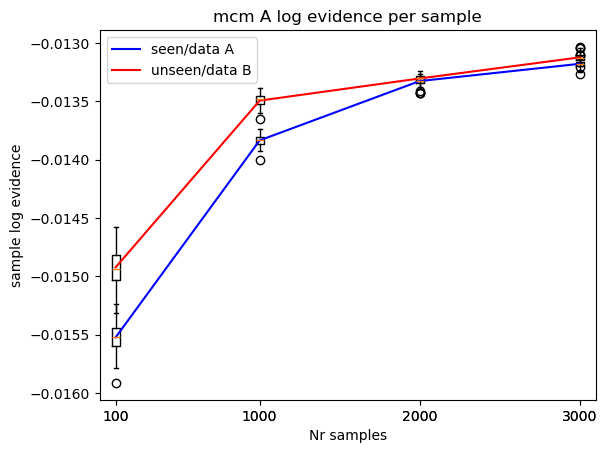

In [ ]:
plt.figure()
plt.boxplot(evids_both_ps[0].T/sample_size, positions=sample_sizes,widths= 50)
plt.boxplot(evids_both_ps[1].T/sample_size, positions=sample_sizes,widths= 50)

plt.plot(sample_sizes,np.mean(evids_both_ps[0]/sample_size,axis=1), label=f"seen/data {letter}", color="blue")
plt.plot(sample_sizes,np.mean(evids_both_ps[1]/sample_size,axis=1),label=f"unseen/data {other_letter}", color="red")

plt.xlim((min(sample_sizes)-100,max(sample_sizes)+100))
plt.ylabel("sample log evidence")
plt.xlabel("Nr samples")
plt.title(f"mcm {letter} log evidence per sample")
plt.legend()
plt.show()